## Esercizio 12.1

L'obiettivo di questa esercitazione è utilizzare modelli di reti neurali profonde, con l'aiuto della libreria Keras in Python, per identificare correttamente le cifre presenti in immagini contenenti una delle 10 cifre scritte a mano.

Il dataset utilizzato, chiamato MNIST, consiste in un insieme di 70000 cifre scritte a mano rappresentate come matrice di dimensioni 28x28 riempita con valori interi $\in [0,255]$.

Dato che ci sono 10 categorie nel problema, corrispondenti alle 10 cifre da riconoscere, ci troviamo di fronte a un problema di classificazione. L'obiettivo è sviluppare un modello di rete neurale che possa assegnare correttamente ogni immagine alla cifra corrispondente.

Utilizziamo il codice messo a disposizione, ho fatto verie prove e ho ottenuto buoni risultati scegliendo come ottimizzatore "adam" con numero di epoche uguale a 20.

In [2]:
import os
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
#flattening
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols) 
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    # mette in modo casuale degli input=0 in modo da evitare overfitting
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    #attivazione è softmax che rende probabilità le dieci componenti
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [5]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer="adam",
                  metrics=['acc']) #metrica non obbligatoria
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [6]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2819 - acc: 0.9182 - val_loss: 0.1078 - val_acc: 0.9668
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1233 - acc: 0.9642 - val_loss: 0.0857 - val_acc: 0.9724
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0871 - acc: 0.9748 - val_loss: 0.0781 - val_acc: 0.9767
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0680 - acc: 0.9802 - val_loss: 0.0876 - val_acc: 0.9746
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0591 - acc: 0.9814 - val_loss: 0.0775 - val_acc: 0.9781
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0469 - acc: 0.9855 - val_loss: 0.0855 - val_acc: 0.9769
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0427 - acc: 0.9874 - val_loss: 0.0799 - val_acc: 0.9803
Epoch 8/20
1875/1875 [==============================] - 11s 6

313/313 [==============================] - 0s 1ms/step - loss: 0.1032 - acc: 0.9835

Test loss: 0.10317006707191467
Test accuracy: 0.9835000038146973


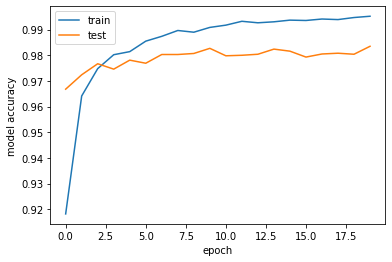

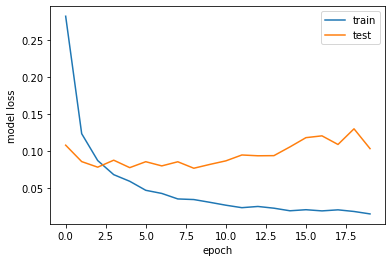

In [7]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Possiamo vedere che l'accuratezza rispetto al set di test si stabilizza intorno alle 10 epoche. Sempre intorno alle 10 epoche invece la funzione di costo inizia ad aumentare, questo potrebbe essere un segnale del fatto che il sistema sta andando in overfitting e che è necessario fermarsi.

In [8]:
predictions = model_DNN.predict(X_test)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

313/313 [==============================] - 0s 1ms/step


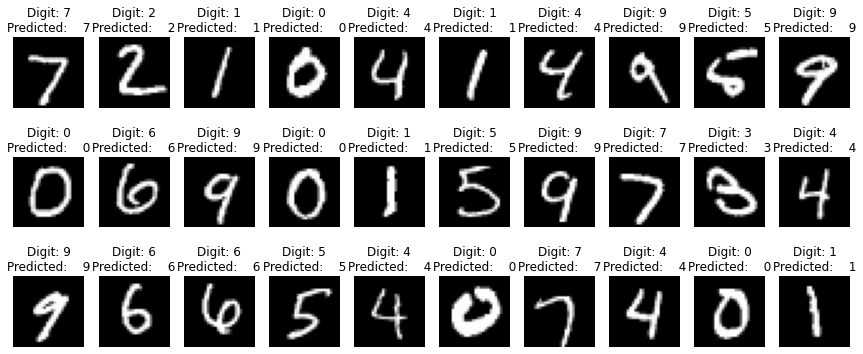

In [9]:
plt.figure(figsize=(15, 15)) 
for i in range(30):    
    ax = plt.subplot(7, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Vediamo le tre file di numeri riconosciute senza problemi.

### Sintesi sugli altri ottimizzatori provati

Ho testato altri ottimizzatori, non riporto tutti i risultati per non appensatire il notebook. Di seguito i risultati ottenuti:

1. sgd: convergenza non velocissima, assolutamente necessarie almeno 20 epoche per ottenere un buon risultato.
2. RMSprop: convergenza più veloce di sgd, già con 10 epoche si ottengono buoni risultati ocn accuratezza intorno al 97.5%. Come per "adam" ad un certo punto la funzione di costo relativa ai dati di test inizia ad aumentare.
3. adam: analizzato precedentemente, buona velocità di convergenza e ottima accuratezza.
4. adadelta: convergenza molto lenta e minore capacità predittiva anche con una ventina di epoche ($\sim 88$%)